https://ru.wikipedia.org/wiki/Функция_Розенброка

для оценки производительности алгоритмов оптимизации

Она имеет глобальный минимум в точке ${(x,y)=(1,1)}$ где ${f(x,y)=0}$.

In [ ]:
def f(x, y):
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2
def grad(x, y):
    dx = 2 * x - 2 + 100 * (-4 * y * x + 4 * x ** 3)
    dy = 100 * (2 * y - 2 * x ** 2)
    return (dx, dy)

In [ ]:
def dist(x1, x2):
    """Квадрат расстояния между векторами (x_new - x_cur)."""
    return (x1[0] - x2[0]) ** 2 + (x1[1] - x2[1]) ** 2

In [ ]:
x0 = (0, 2)  # начальная точка
gamma = 1e-3  # если 0.1, то не работает, слишком большой шаг
x_cur = x0

vals = []
coords = []
i = 0
while True:
    x_new = (x_cur[0] - gamma * grad(*x_cur)[0],
            x_cur[1] - gamma * grad(*x_cur)[1])
    # функция f(x, y) положительная, поэтому первый вариант условия остановки: if f(*x_cur) < 0.01:
    # последние 2,000 итераций точка практически не изменялась, поэтому
    # можем отслеживать расстояние между точками как условие остановки
    if dist(x_new, x_cur) < 1e-9:  
        break
    x_cur = x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i += 1
    if i % 1000 == 0:
        print(f"iter={i}; x=({x_cur[0]:.2f}, {x_cur[1]:.2f});"
              f" f(x)={f(*x_cur):.2f}; grad f(x)=({grad(*x_cur)[0]:.2f}, {grad(*x_cur)[1]:.2f})")

iter=1000; x=(0.68, 0.47); f(x)=0.10; grad f(x)=(-0.22, -0.30)
iter=2000; x=(0.83, 0.68); f(x)=0.03; grad f(x)=(-0.09, -0.15)
iter=3000; x=(0.89, 0.80); f(x)=0.01; grad f(x)=(-0.05, -0.09)
iter=4000; x=(0.93, 0.87); f(x)=0.00; grad f(x)=(-0.03, -0.06)
iter=5000; x=(0.96, 0.92); f(x)=0.00; grad f(x)=(-0.02, -0.04)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

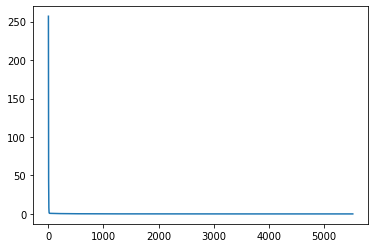

In [ ]:
plt.plot(vals)

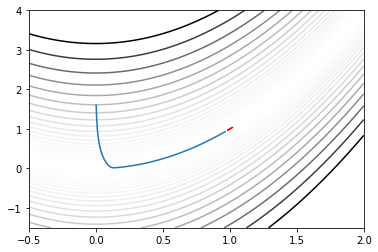

In [ ]:
n = 100 # number of discretization points along the x-axis
m = 100 # number of discretization points along the x-axis
a=-0.5; b=2. # extreme points in the x-axis
c=-1.5; d=4. # extreme points in the y-axis
# сетка из 10,000 точек
X,Y = np.meshgrid(np.linspace(a,b,n), np.linspace(c,d,m))

Z = f(X,Y)

plt.xlim(a,b)
plt.ylim(c,d)

plt.contour(X,Y,Z, np.logspace(-0.5, 3, 31),cmap='gray_r')
plt.plot([c[0] for c in coords], [c[1] for c in coords])
plt.scatter(1,1,c='red')



In [ ]:
from scipy import optimize

In [ ]:
def f_for_scipy(x):
    """Можно использовать вместо лямбды ниже."""
    return f(x[0], x[1])

In [ ]:
optimize.minimize(lambda x: f(*x), x0=(0, 0)) 

#  fun: 2.8439678482945157e-11 Значкние функции почти 0
# nit: 19 кол-во итераций
# hess_inv: используется вторая производная, обратная матрица
# jac значение градиента в оптимальной точке

      fun: 2.8439678482945157e-11
 hess_inv: array([[0.49482463, 0.98957652],
       [0.98957652, 1.98394249]])
      jac: array([ 3.98697753e-06, -2.84422585e-06])
  message: 'Optimization terminated successfully.'
     nfev: 96
      nit: 19
     njev: 24
   status: 0
  success: True
        x: array([0.99999467, 0.99998932])

## Задания

In [ ]:
# 7.1 найти минимум

def f(x, y):
    return 2*x**2 - 4*x*y + y**4 + 2

# если начать с (0, 0), то найденный минимум = 2
optimize.minimize(lambda x: f(*x), x0=(1,1))

      fun: 1.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([2.98023224e-08, 8.94069672e-08])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([1., 1.])

In [ ]:
# 7.2

def f(x, y):
    return (2.1 - x - y)**2 + (2.9 - x - 3*y)**2 + (4.1 - x - 5*y)**2

optimize.minimize(lambda x: f(*x), x0=(10,10))

      fun: 0.0266666666671097
 hess_inv: array([[ 0.72926369, -0.18745323],
       [-0.18745323,  0.06252255]])
      jac: array([-2.07545236e-06, -7.31856562e-06])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([1.53333326, 0.49999991])

In [ ]:
# 7.3

def f(x, y, z):
    return x**3 - 2*x**2 + y**2 + z**2 - 2*x*y + x*z - y*z + 3*z

optimize.minimize(lambda x: f(*x), x0=(0,0,0))

      fun: -6.999999999999065
 hess_inv: array([[0.1694933 , 0.16823764, 0.00210979],
       [0.16823764, 0.83505246, 0.33489336],
       [0.00210979, 0.33489336, 0.66844386]])
      jac: array([ 3.69548798e-06, -6.55651093e-07,  1.01327896e-06])
  message: 'Optimization terminated successfully.'
     nfev: 55
      nit: 9
     njev: 11
   status: 0
  success: True
        x: array([ 2.00000048,  1.00000032, -1.99999961])

In [ ]:
# 8.2 Напишите следующую точку градиентного спуска с momentum для функции
import numpy as np

def f(x, y, z):
    return 2*x**2 - 4*x*z + 4*y**2 - 8*y*z + 9*z**2 + 4*x + 8*y - 20*z

curr = np.array([1, 2, -5])  # текущая точка
prev = np.array([0, 0, 0])  # перед ней была
lamb = 0.25
alpha = 1

In [ ]:
from sympy import symbols, Derivative, diff

x, y, z = symbols('x y z')

In [ ]:
def grad_func(x_val, y_val, z_val, expr):
    """Evalute gradient of a function in 3 variables at a given point."""
    dx, dy, dz = diff(expr, x), diff(expr, y), diff(expr, z)
    dx_eval = dx.subs([(x, x_val), (y, y_val), (z, z_val)])
    dy_eval = dy.subs([(x, x_val), (y, y_val), (z, z_val)])
    dz_eval = dz.subs([(x, x_val), (y, y_val), (z, z_val)])
    return np.array([dx_eval, dy_eval, dz_eval])


expr = 2*x**2 - 4*x*z + 4*y**2 - 8*y*z + 9*z**2 + 4*x + 8*y - 20*z
grad_func(*curr, expr)
# array([28, 64, -130], dtype=object)

array([28, 64, -130], dtype=object)

In [ ]:
curr - lamb*grad_func(*curr) + alpha*(curr - prev)
# -5,-12,22.5

array([-5.00000000000000, -12.0000000000000, 22.5000000000000],
      dtype=object)

## Метод Ньютона

${x^{(n+1)} = x^{(n)} - [Hf(x^{(n)})]^{-1} \nabla f(x^{(n)})}$

In [ ]:
def eval_grad_2_var(x_val, y_val, expr):
    """Evalute gradient of a function in 2 variables at a given point."""
    dx, dy = diff(expr, x), diff(expr, y)
    dx_eval = dx.subs([(x, x_val), (y, y_val)])
    dy_eval = dy.subs([(x, x_val), (y, y_val)])
    return np.array([dx_eval, dy_eval])

expr = x**2 + x*y - 2*x + 3*y - 1
point = np.array([0, 1])
eval_grad_2_var(*point, expr)

array([-1, 3], dtype=object)

In [ ]:
#  9.4

# Найдите следующий шаг метода Ньютона для функции

expr = x**2 + x*y - 2*x + 3*y - 1
point = np.array([0, 1])  # текущая точка
subs = [(x, 0), (y, 1)]

def hesse(expr, subs):
    hesse = np.array(
        [
        [diff(expr, x, x).subs(subs), diff(expr, x, y).subs(subs)],
        [diff(expr, y, x).subs(subs), diff(expr, y, y).subs(subs)]
        ]
        )
    return hesse

hesse(expr, subs)

array([[2, 1],
       [1, 0]], dtype=object)

In [ ]:
point - np.linalg.inv(hesse(expr, subs).astype('float')) @ eval_grad_2_var(*point, expr)
# -3,8

array([-3.00000000000000, 8.00000000000000], dtype=object)